[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/4_ex_data_prep.ipynb) 

# BADS Exercise 4 on data preparation
This exercise revisit some of the concepts covered in [Tutorial 4 on data preparation](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb). That tutorial was rather comprehensive and provided a lot of materials and codes associated with typical tasks in the wide scope of data preparation. Therefore, the exercises will not go beyond [Tutorial 4](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb). Rather, we will consider a different data set and repeat some standard data prep. tasks for that data set.   

## 1 Loading the data 
The data set for this tutorial comes from the classic Book Credit Scoring and its Applications by Lyn C. Thomas, David B. Edelman, and Jonathan N. Crook. You can obtain the data, called *loan_data* from our [GitHub repository](https://github.com/Humboldt-WI/bads/tree/master/data). The data folder of the repository also provides a file *loan_data_dictionary*, which offers a brief description of the features in this data set. In a nutshell, the data represents yet another vanilla credit scoring task with a binary target variable, indicating whether bank customers repaid their debt or defaulted, and a few features characterizing credit applicants. Your first task is to load the data into a `Pandas DataFrame`.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the data (either from disk or directly from the web)
url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/loan_data.csv'
data = pd.read_csv(url, sep = ";")

By now, you have run through the process of getting a first idea about a new data set many times. You have seen examples in previous tutorials and have written your own codes in, e.g., the third exercise on predictive analytics. Nonetheless, draw once more on your experience and take a quick look into the data.  

In [4]:
# Some space for any code you want to write to take a first look
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YOB      1225 non-null   float64
 1   nKIDS    1225 non-null   float64
 2   nDEP     1225 non-null   float64
 3   PHON     1225 non-null   int64  
 4   dINC_SP  1225 non-null   float64
 5   EMPS_A   1225 non-null   object 
 6   dINC_A   1225 non-null   float64
 7   RES      1225 non-null   object 
 8   dHVAL    1225 non-null   float64
 9   dMBO     1225 non-null   float64
 10  dOUTM    1225 non-null   float64
 11  dOUTL    1225 non-null   float64
 12  dOUTHP   1225 non-null   float64
 13  dOUTCC   1225 non-null   float64
 14  BAD      1225 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 143.7+ KB


## 2 Data types
You can tell from the data dictionary that the loan data includes numeric and categorical variables. Draw on the examples from [Tutorial 4](https://github.com/Humboldt-WI/bads/blob/master/tutorials/4_nb_data_preparation.ipynb) and make sure that all numeric features are stored as `float32` and all categorical features are stored as categories in your DataFame

In [5]:
# Conversion of data types where needed
filter_num = ["YOB", "nKIDS", "nDEP"]
filter_bool = ["PHON", "BAD"]
filter_cat = ["EMPS_A", "RES"]

data[filter_num] = data[filter_num].astype("int64")
data[filter_bool] = data[filter_bool].astype("bool")
data[filter_cat] = data[filter_cat].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   YOB      1225 non-null   int64   
 1   nKIDS    1225 non-null   int64   
 2   nDEP     1225 non-null   int64   
 3   PHON     1225 non-null   bool    
 4   dINC_SP  1225 non-null   float64 
 5   EMPS_A   1225 non-null   category
 6   dINC_A   1225 non-null   float64 
 7   RES      1225 non-null   category
 8   dHVAL    1225 non-null   float64 
 9   dMBO     1225 non-null   float64 
 10  dOUTM    1225 non-null   float64 
 11  dOUTL    1225 non-null   float64 
 12  dOUTHP   1225 non-null   float64 
 13  dOUTCC   1225 non-null   float64 
 14  BAD      1225 non-null   bool    
dtypes: bool(2), category(2), float64(8), int64(3)
memory usage: 110.8 KB


## EDA
### 3.1 Histogram
The data includes a feature dINC_A, which captures the income of a credit applicant. We would expect that this feature is related to our target variable, which is called BAD in the data set. 

Create a histogram plot of the income feature and examine its distribution.

<AxesSubplot:>

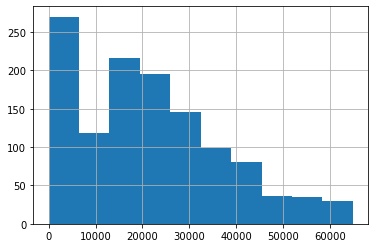

In [6]:
# Histogram of dINC_A 
import seaborn as sns
#sns.distplot(data["dINC_A"])
data["dINC_A"].hist()

The distribution reveals some potentially important insights. However, the histogram alone does not suffice to check our intuition that income and credit risk are related. To that end, let's examine the income distribution across good and bad credit applications.

### 3.2 Analysis of the dependency between applicants' income and credit risk
We begin with a manual approach, which also allows us to revisit logical indexing in Python and Pandas. Calculate the average income of a credit applicant for good risks and for bad risks.

In [7]:
# Calculate the group-wise mean of dINC_A for good and bad risks using logical indexing
data.groupby("BAD")["dINC_A"].mean()

BAD
False    23008.643016
True     16316.913313
Name: dINC_A, dtype: float64

Remember that the Pandas function `value_counts()` allows you to perform an analysis similar to your above calculation of the group-wise means. Replicate the previous calculation using `value_counts()`.  

In [8]:
# Function value_counts()
a,b = data["BAD"].value_counts()
1/a * data.loc[data["BAD"] == 0, "dINC_A"].sum(), 1/b * data.loc[data["BAD"] == 1, "dINC_A"].sum()

(23008.643015521066, 16316.9133126935)

Next, we perform a graphical analysis. Depict the distribution of the income of customers with a good and bad risk, respectively, by means of a box-plot.

<AxesSubplot:title={'center':'dINC_A'}, xlabel='BAD'>

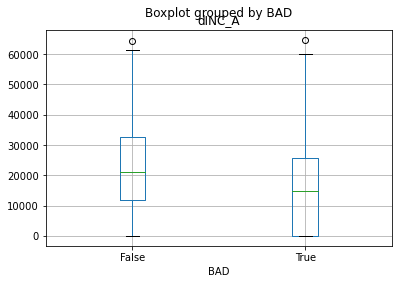

In [9]:
# Box plot
data.boxplot("dINC_A", by = "BAD")

### 3.3 Statistical testing
Identify an appropriate statistical test to verify whether the observed income difference between good and bad applicants is statistically significant. Perform the test and display its results. Hint: A web-search similar to “statistical test difference in means python” will help.

In [10]:
# Statistical testing of mean difference
from scipy import stats
stats.ttest_ind(data.loc[data["BAD"] == 0, "dINC_A"], data.loc[data["BAD"] == 1, "dINC_A"])

Ttest_indResult(statistic=6.604086695898404, pvalue=5.950117278929748e-11)

### 3.4 Categorical variables
The data set comprises three categorical features. The feature PHON is binary and will not cause any issues. The features EMPS_A and RES are more interesting. Remember to check the data dictionary to understand what information the features encode. 

In the lecture, we explained that categorical features are typically encoded using dummy variables prior to applying an analytical model. Python supports dummy coding in several ways.  Pandas offers a function `get_dummies()` and sklearn offer a class `OneHotEncoder()`. The Pandas approach is maybe a bit easier to use. The more prevalent approach in practice is to rely on sklearn. 

Check the documentation of one or both of the above functions. Then create dummy variables for the feature RES and add them to your DataFrame.   

In [11]:
# Dummy coding of RES
pd.get_dummies(data["RES"])

,F,N,O,P,U
0,0,0,1,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
1220,0,0,0,0,1
1221,0,0,1,0,0
1222,0,0,1,0,0
1223,0,1,0,0,0


The feature EMPS_A has more distinct levels. Considering the previous task, it is obvious that dummy coding the feature will increase dimensionality substantially. To avoid this, it makes sense to **regroup** the category levels prior to dummy coding. 

In the lecture on data preparation, we argued that a pivot table helps to identify category levels that we can merge. Specifically, we were recommending merging category levels for which the odds-ratio (i.e., the ratio of goods to bads) is similar. Write code to calculate the odds ratio for each level of the feature EMPS_A

# Well done. You did great in solving all the exercises!

In [48]:
# Calculation of the odds-ratio for EMPS_A
cock = pd.crosstab(data.EMPS_A, data.BAD).apply(lambda r: r/r.sum(), axis=1)
cock

BAD,False,True
EMPS_A,,
B,0.733333,0.266667
E,0.709677,0.290323
M,0.739130,0.260870
N,0.833333,0.166667
P,0.777778,0.222222
R,0.528846,0.471154
T,0.699187,0.300813
U,0.500000,0.500000
V,0.809524,0.190476


Now merge some category levels based on your solution to the previous task.  

In [43]:
# Merge category levels from EMPS_A


series[mask].index

CategoricalIndex(['R', 'W', 'Z', 'U'], categories=['B', 'E', 'M', 'N', 'P', 'R', 'T', 'U', ...], ordered=False, dtype='category')

In [47]:
threshold_percent = 0.2
series = pd.value_counts(data['EMPS_A'])
mask = (cock[0]-cock[1]).abs().lt(threshold_percent)
data_new = data.assign(EMPS_A_new = np.where(data['EMPS_A'].isin(series[mask].index),'Other', data['EMPS_A']))
data_new.EMPS_A_new.value_counts()

P        531
V        231
Other    157
E        124
T        123
B         30
M         23
N          6
Name: EMPS_A_new, dtype: int64

The advantage of merging category levels is that we need less dummy variables for encoding the feature. On the other hand, by reducing category levels, we run the risk of losing information. It would make sense to check that our previous merging of category levels did not hurt, e.g., was not too aggressive. Why aggressive? Well, imagine you merge all category levels into one level. This would render the feature useless. So there is a trade-off between having few levels, to not increase dimensionality, and not having too few levels, to sustain the information in the feature for distinguishing good and bad applicants. To find a healthy balance between these conflicting objectives, we need a measure that tells us whether a grouping is informative. It turns out that a well-known statistical test, namely the $\chi^2$ test, provides this functionality. 
- Run a quick web search to revisit the $\chi^2$ test and understand how it is useful for judging a grouping of EMPS_A in our context.
- Identify a way to calculate the $\chi^2$ test statistic in Python
- Calculate the test statistic for the original version of EMPS_A with 11 levels and the new version with less levels (i.e., solution to previous task)
- Based on the results, conclude which encoding of EMPS_A is more suitable. 


In [ ]:
# Chi^2 testing


**Optional**
By solving the previous task, you created a rather powerful mechanism to regroup categorical variables and optimize the number of levels prior to applying dummy coding. Write a function that wraps-up this functionality. In particular, your function should:
- receive a categorical variable as input
- check that the variable is actually a category
- determine the number of unique levels
- iteratively reduce the number of levels by 
  - calculating the odds-ratio of all current levels
  - and merging the two levels whose odds ratio is most similar
  - calculate the $\chi^2$ statistic for the current grouping and store its value
- Identify the best grouping of the categorical variable

In [ ]:
# Solution to the optional task
def optimize_grouping(x):
    
    